In [0]:
pathway = './'

In [0]:
ID_dict = {}
with open(pathway + 'raw_data/cullpdb_pc40_res2.0_R0.25_d200430_chains15403.txt', 'r') as f:
    next(f)
    for line in f:
        ID_dict[line.split()[0]] = ''


In [0]:
data_dict = {}
with open(pathway + 'raw_data/ss_d200430.txt', 'r') as f:
    for line in f:
        if '>' in line:
            line = line.replace('>','')
            word = line.strip('\n').split(':')
            key, data_class = word[0] + word[1], word[2]
            continue
        if key in ID_dict:
            try:
                data_dict[key][data_class] += line.strip('\n')
            except KeyError:
                data_dict[key] = {'sequence':line.strip('\n'), 'secstr':''}

In [0]:
aa_set = set()
ss_set = set()

for key in data_dict:
    data_dict[key]['secstr'] = data_dict[key]['secstr'].replace(' ','C')
    aa_set |= set(list(data_dict[key]['sequence']))
    ss_set |= set(list(data_dict[key]['secstr']))

In [0]:
aa_count = {i:0 for i in sorted(list(aa_set))}
ss_count = {i:0 for i in sorted(list(ss_set))}
for key in data_dict:
    for aa in aa_count:
        aa_count[aa] += data_dict[key]['sequence'].count(aa)
    for ss in ss_count:
        ss_count[ss] += data_dict[key]['secstr'].count(ss)

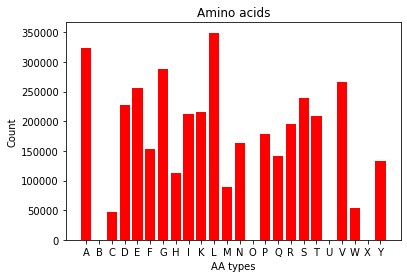

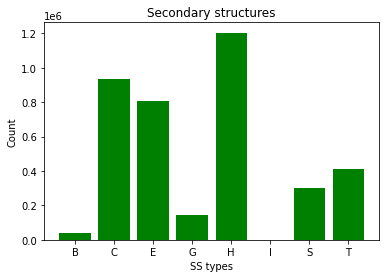

In [7]:
import matplotlib.pyplot as plt
plt.bar(aa_count.keys(), aa_count.values(), color='red')
plt.title('Amino acids')
plt.xlabel('AA types')
plt.ylabel('Count')
plt.show()
plt.bar(ss_count.keys(), ss_count.values(), color='green')
plt.title('Secondary structures')
plt.xlabel('SS types')
plt.ylabel('Count')
plt.show()

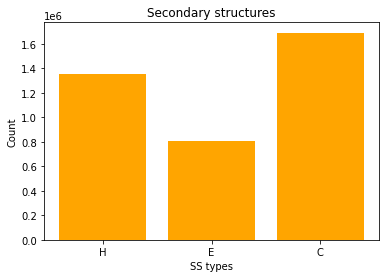

In [8]:
ss_count_3type = {'H':ss_count['H']+ss_count['G']+ss_count['I'],
                  'E':ss_count['E'],
                  'C':ss_count['B']+ss_count['C']+ss_count['S']+ss_count['T']}

plt.bar(ss_count_3type.keys(), ss_count_3type.values(), color='orange')
plt.title('Secondary structures')
plt.xlabel('SS types')
plt.ylabel('Count')
plt.show()

Min-length: 20
Max-length: 1632
Avg: 251.20170973636127
Stdev: 155.59392886175334


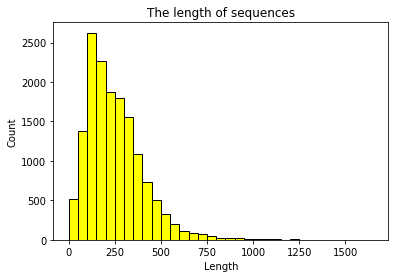

In [9]:
import statistics as st
seq_length = [len(data_dict[key]['sequence']) for key in data_dict]
print('Min-length:', min(seq_length))
print('Max-length:', max(seq_length))
print('Avg:', st.mean(seq_length))
print('Stdev:', st.stdev(seq_length))
plt.hist(seq_length, bins=range(0, 1700, 50), ec='black', fc='yellow')
plt.title('The length of sequences')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

In [0]:
with open(pathway + 'raw_data/features.dat', 'w') as f1, open(pathway + 'raw_data/labels_8types.dat', 'w') as f2, open(pathway + 'raw_data/labels_3types.dat', 'w') as f3:
    for key in data_dict:
        seq = data_dict[key]['sequence']
        ss_8type = data_dict[key]['secstr']
        ss_3type = data_dict[key]['secstr'].replace('G','H').replace('I','H').replace('B','C').replace('S','C').replace('T','C')
        if 'B' not in seq and 'O' not in seq and 'U' not in seq and 'X' not in seq:
            print(seq, file=f1)
            print(ss_8type, file=f2)
            print(ss_3type, file=f3)